On my road trip, I kept track of (almost) all the money I spent. I was already fairly surprised with some of my [quick calculations](/2019/07/road-trip-stats) about how little I ended up spending (just around $4000!), and I also wanted to dive a bit more into how much I spent, where, and on what. So here we go!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The data

I tracked all my expenses in a notebook throughout my trip, and then entered them into an Excel spreadsheet.

In [2]:
df = pd.read_excel('money.xlsx')
# Last column just has some notes, but no data
df = df.iloc[:, :5]
df.head()

,date,item,price,category,ben_or_claire
0,2019-02-17,gas,37.14,car,NaN
1,2019-02-17,sonic,4.90,food,NaN
2,2019-02-18,coffee,2.50,food,NaN
3,2019-02-18,lunch,12.00,food,NaN
4,2019-02-18,dinner tacos,8.15,food,NaN


I tracked the date, the expense, and the price. I also manually assigned each expense a "category." And, for the parts of the trip where Ben joined me, I also tracked who paid for the expense. Unfortunately, I didn't do a great job of tracking expenses during these weekends, so I probably won't be able to dig into that split.

Anyway, let's see how much I spent on each category:

In [3]:
(df.groupby('category')
    .sum()
    .sort_values(by='price', ascending=False)
    #.plot(kind='bar', rot=45)
)

,price
category,
car,1721.53
food,1235.75
gear,659.79
lodging,569.02
fun,382.89
dumb,134.01
postcards,83.06
misc,59.70
souvenirs,29.00


Okay, nothing super wild here: as expected, car and food-related expenses were the largest part. Gear also ended up being a lot, mostly because I had to buy most of my camping-related gear at the beginning of the trip (a worthy investment, I hope!) Interestingly, lodging was pretty high too -- but I'm guessing this has to do with the parts of the trip where Ben joined me, and we paid for AirBnBs.

Let's look into a couple of the more dubious categories: "dumb" (this is when I locked myself out, I think), "gear" (which has a few confusing entries), "misc" (what does that even mean), and "souvenirs" (I think that was also only one purchase).

In [4]:
check_cats = ['dumb', 'gear', 'misc', 'souvenirs']
df.query('category == @check_cats').sort_values(by='category')

,date,item,price,category,ben_or_claire
22,2019-02-25,phone repair,69.01,dumb,NaN
203,2019-04-27,car lockout,65.00,dumb,NaN
21,2019-02-25,rei,1.60,gear,NaN
37,2019-02-26,knife,8.09,gear,NaN
77,2019-04-17,propane,9.36,gear,NaN
131,2019-05-01,home depot,11.66,gear,NaN
172,2019-05-19,propane,6.38,gear,NaN
188,2019-05-24,rei,124.33,gear,NaN
204,2019-02-14,rei,352.40,gear,NaN
205,2019-02-16,rei (parents paid),297.55,gear,NaN


Oh, right! Not only did I lock myself out of my car at the Grand Canyon, but I also broke my phone on the first part of my trip and had to fix it. Okay, we'll leave these two "dumb" expenses in.

The gear category is a bit tough: I exchanged my air mattress a few times, and was eventually reimbursed for it, which explains the "negative" expense on 5/28. Also, my parents got me a lot of gear for the combination of Christmas, graduation, and my birthday -- that's the 2/16 trip for about $300. We'll leave that in here, though, since that's money that I was going to spend on this trip regardless. 

Like I thought, there's only one souvenir expense (oops lol). I'll just lump that into the "misc" category.

In [5]:
# Replace "souvenir" category with "misc"
df['category'] = df['category'].replace('souvenirs', 'misc')

## The road trip expenses

Ok, now I'm ready to dive in. I'll first look only at the parts of the trip that I spent on my own, since when Ben was visiting we stayed in AirBnB's and went out a lot -- lots of fun, definitely a great way to spend time and money, but not the road trip I was planning or intending for. 

Let's look at how much I spent on each category during each part of the trip. I'll do a bit of pandas-fu to get the sum of all expenses in each category, one time for the whole dataset and one time just for the part where it was only me. 

Coding notes: I [just learned](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html) that you can use the `.assign()` to make a new column within a chain of pandas commands, like the R version of `mutate`. Cool!

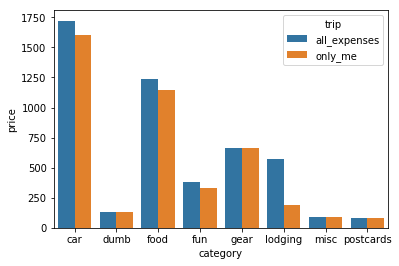

In [6]:
category_totals = pd.concat([
    df.groupby('category').sum().assign(trip='all_expenses').reset_index(),
    df[df['ben_or_claire'].isna()].groupby('category').sum().assign(trip='only_me').reset_index()
])

sns.barplot(data=category_totals, x='category', y='price', hue='trip')

Hm, it's pretty hard to tell how much I spent on the part of the trip with Ben. Let's directly calculate the difference...

In [7]:
# Convert tidy data to wide data so I can subtract columns
wide_totals = category_totals.pivot(index='category', columns='trip', values='price')

wide_totals['all_expenses'] - wide_totals['only_me']

category
car          120.85
dumb           0.00
food          92.34
fun           50.00
gear           0.00
lodging      382.65
misc           0.00
postcards      0.00
dtype: float64

Hm. That's definitely not the whole picture. I'm pretty sure the food and fun expenses are way off, and that I spent way more than just \\$142 during the parts with Ben -- but that makes sense, given that I didn't really keep track of everything I spent during those days, let alone what Ben was spending. Also those parts involved much more alcohol and spontaneous purchases sooo... 😅

I also don't fully remember how I entered the lodging bills -- sometimes I think I put down the full cost (like when I paid for our AirBnBs on the first part of the trip), but other times I only put down my part (especially when Ben paid).  

Anyway, no need to dive into this because I *know* I have incomplete data. Let's move on with analyzing just the road trip part where I was alone! That said, I'll keep any car expenses that I encountered during our joint trip, because I would have needed to pay those anyway. I'll remove any food we split because that's just too complicated...

In [245]:
# Keep only rows without anything in the ben/claire column,
# and keep all rows with the "car" category
df = df[ (df['category'] == "car") | (df['ben_or_claire'].isna()) ]

df['price'].sum()

4349.76

Ok, so after all this cleaning and manipulation the total amount I spent looks a little different than what I [posted previously](/2019/07/road-trip-stats), but basically the same: on my ~3 month road trip, I spent about $4300!

I have a lot of questions that I could answer by combining this data with my other mileage and lodging datasets, but for now let's see what questions we can answer just from this data alone.

### Daily expenses

If we divide that by the total number of days I was on this trip for (105), that gives us an estimate of the daily cost* of my cross-country road trip!

_\*Of course, that's recognizing that there's a couple of high-expense weekends missing in this average, which would have been replaced by camping or crashing with friends -- so the daily average for a pure road trip should be a little higher than this._

In [8]:
df.groupby('category').sum().sort_values(by='price', ascending=False) / 105

,price
category,
car,16.395524
food,11.769048
gear,6.283714
lodging,5.419238
fun,3.646571
dumb,1.276286
misc,0.844762
postcards,0.791048


Hah! Glad to see my "dumb" mistakes averaged out to only costing me a little over a dollar a day! 😆 And not bad -- only $12 per day for food and $21 total for transportation and lodging. Also, I'll note that the daily gear cost will keep doing as time passes, since I own that stuff forever now!

Ok, that said we all know that the average isn't necessarily that informative. Especially on this trip, I think I tended to spend a lot of money for a few days and then go to the wilderness for a few days and not spend anything at all. Let's see if this impression is correct. 

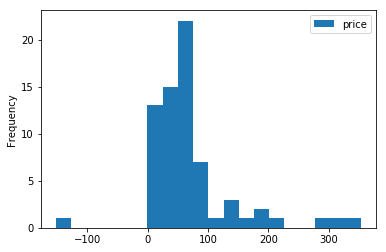

In [9]:
df.groupby('date').sum().plot(kind='hist', bins=20)

At first, this histogram surprised me because there seem to be so _few_ days where I spent zero money. But actually, this data doesn't include those days! So this histogram just shows the money I spent, on days when I spent _some_ money.

Also, note that the one negative value is the day I got reimbursed for the sleeping pad I returned. It had sprung a leak twice, and the second time I went to REI to exchange it they told me I couldn't do that without being flagged in the system, so I had to return it. I also spent some money buying a new pad that same day, but the reimbursement wasn't processed till a few days after so it was on its own day.

Anyway, back to my questions about my spending habits. First up: how many days in a row would I spend money?

In [11]:
days_btw_purchases = df.sort_values(by='date')['date'].drop_duplicates().diff().dt.days

# Remove the large value which represents the month I went to Malaysia
days_btw_purchases[days_btw_purchases < 30].value_counts()

1.0    59
2.0     6
3.0     2
Name: date, dtype: int64

So there were 55 days in a row where I made some sort of purchase, and only 2 days where I waited 3 days between purchases. I didn't ever wait more than 3 days (except the one-month break when I went to Malaysia, lol).

This is actually quite surprising! In my mind, I would go to the big city, buy a bunch of stuff, and then retreat to the wilderness. But now that I think about it, in actuality I would do that, but for big expenses only. I made small purchases almost every day, either stopping by a coffee shop or getting pie at Capitol Reef or other small joys.

Let's see how these numbers change as I increase the amount of money that I consider a "purchase":

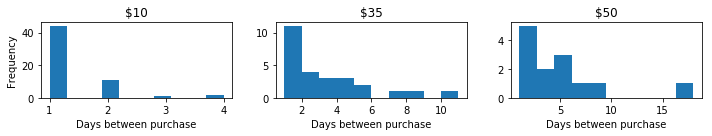

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(10, 2))

prices = [10, 35, 50]
i = 0
for p in prices:
    
    days_btw_purchases = df.query('price > @p').sort_values(by='date')['date'].drop_duplicates().diff().dt.days
    days_btw_purchases[days_btw_purchases < 30].plot(kind='hist', ax=ax[i])
    
    ax[i].set_title('${}'.format(p))
    if i == 0:
        ax[i].set_ylabel('Frequency')
    else:
        ax[i].set_ylabel('')

    ax[i].set_xlabel('Days between purchase')
    i += 1
fig.tight_layout()

Damn. There were five times when I spent more than \\$50 two days in a row?? (That's what the left-most bar in the \\$50 panel tells me). And in general, there were only a few times when I went more than a week in between > \\$50 expenses. 

On the flip side, there was only one time when I went like 5 days without spending more than \\$10. This was probably the week that I was hanging out in Utah, from Bryce to Moab. 

The \\$35 price cutoff is intersting, because it kind of _de facto_ removes most of my gas fillups since they were usually about \\$30. Here the purchases are more varied: sometimes I spent more than \\$35 two days in a row, and other times I went about a week without spending that much on any given day. This jives much more with my feeling on how I spent money this trip.

Either way, I was maybe a less big spender than I expected (\\$4300 is so little for such a massive trip), but definitely a _more frequent_ spender than I thought.

### Gas, groceries, and camping

Now let's zoom in more specifically to the three big categories of expenses, and the ones you might be most interested in if you're planning your own trip. 

The "car" category includes gas and other things, but for now I'm honestly only interested in looking at how often I paid for gas. Similarly, let's focus on my grocery shopping trips rather than eating out, since if you were trying to have the cheapest road trip possible then this would be the most important thing to look at.

In [13]:
# Find all gas and grocery expenses, and put them in their own sub category
df['sub_category'] = df['category']
df.loc[df['item'].str.contains('gas'), 'sub_category'] = 'gas'
df.loc[df['item'].str.contains('groceries'), 'sub_category'] = 'groceries'

I'll do a similar analysis as above, looking at how many days in a row I spent money on each given thing. This time, though, I'll look within each category only. For example, this will let me answer "on average, how many days would I go between filling up my tank?"

In [16]:
# Calculate days between spending on the same category
df['days_since_last_same_category'] = df.sort_values(by='date').groupby('category')['date'].diff().dt.days
df['days_since_last_same_subcategory'] = df.sort_values(by='date').groupby('sub_category')['date'].diff().dt.days

# Remove the large gap from Malaysia
df.loc[df['days_since_last_same_category'] > 30, 'days_since_last_same_category'] = np.nan
df.loc[df['days_since_last_same_subcategory'] > 30, 'days_since_last_same_subcategory'] = np.nan

df.head(10)

,date,item,price,category,ben_or_claire,sub_category,days_since_last_same_category,days_since_last_same_subcategory
0,2019-02-17,gas,37.14,car,NaN,gas,NaN,NaN
1,2019-02-17,sonic,4.90,food,NaN,food,NaN,NaN
2,2019-02-18,coffee,2.50,food,NaN,food,1.0,1.0
3,2019-02-18,lunch,12.00,food,NaN,food,0.0,0.0
4,2019-02-18,dinner tacos,8.15,food,NaN,food,0.0,0.0
5,2019-02-18,gas,32.89,car,NaN,gas,1.0,1.0
6,2019-02-18,groceries,35.21,food,NaN,groceries,0.0,NaN
7,2019-02-19,gas,23.41,car,NaN,gas,1.0,1.0
8,2019-02-19,guitar center,68.17,fun,NaN,fun,NaN,NaN
9,2019-02-20,gas,8.66,car,NaN,gas,1.0,1.0


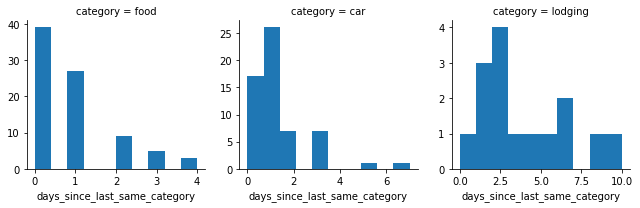

In [17]:
keep_cats = ['food', 'car', 'lodging']
g = sns.FacetGrid(data=df.query('category == @keep_cats'), col='category', 
                  sharey=False, col_order=keep_cats, sharex=False)
g.map(plt.hist, 'days_since_last_same_category')

Hm. This is also surprising, and tells me that I spent money on way more days than I thought. (I am seeing this in the fact that the "0" bar is quite large on all histograms, indicating that I frequently went zero days in between sequential purchases).

Specifically, I bought food two days in a row about 40 times. And then the majority of the rest of the times I bought food were just 1 day apart. In other words, for the majority of my trip I bought food either every day or every other day.

Looks like the story is pretty similar for car-related expenses: the majority of expenses had a lag of 0-2 days. So for the majority of my trip, I spent money on my car somewhere between every day and every 3 days. That makes sense -- I usually moved to a new spot every 2-3 days, which entailed a lot of driving, and I must have gotten gas basically every time I did that.

Now, lodging. Let's see: does this make sense? My impression is that I super rarely paid for housing... What this is saying is that yes, there were a few times when I went a week or more without paying for housing, but when I did pay for housing I paid for housing again within the next three days. I have a separate spreadsheet where I tracked the lodging expenses more cleanly, we'll have to come back to this when we analyze that one...

Let's zoom into the groceries and gas question, because I think these expenses are where I'm drawing my intuition from.

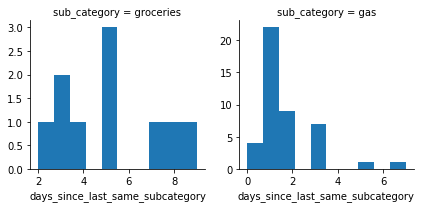

In [18]:
keep_subcats = ['groceries', 'gas']
g = sns.FacetGrid(data=df.query('sub_category == @keep_subcats'), col='sub_category', 
                  sharey=False, col_order=keep_subcats, sharex=False)
g.map(plt.hist, 'days_since_last_same_subcategory')

Yeah, I think this checks out. Of the 9 times I bought groceries, about 2/3 of them were at least 5 days apart (these are the bars on the right of the "groceries" plot). That makes sense -- I feel like I tended to buy groceries about once a week, and sometimes I'd have forgotten something so would need to swing back by the store the next day to get a bit more.

Similarly, most of my gas purchases were something like 2-3 days apart. This also makes sense, given my reasoning above about how often I was on the move.

## Coffee

Okay, I'm getting a bit tired of this deep dive but there is one more thing I want to know: how much money did I spend on caffeine?

As I was putting these data into the spreadsheet, I found myself often typing "coffee" or "tea." Ruh roh...

In [19]:
# Get any items where I specified coffee or tea
df[df['item'].str.contains('coffee|tea')]['item'].value_counts()

coffee                  15
tea                      3
coffee and lunch         2
coffee and donuts        1
tea and gatorade         1
coffee and breakfast     1
coffee and taters        1
coffee and muffin        1
pie and coffee           1
iced tea                 1
Name: item, dtype: int64

Hehe, can you tell that I liked to treat myself to coffee in a variety of ways? :)

I'll note here that I _also_ had instant coffee available, which isn't included in these expenses (I bought a super-pack at Costco). Pro-tip for all my fellow road tripping caffeine addicts: the Starbucks instant coffee is actually quite nice! There was even once where I treated myself to "real" coffee at some Bryce Canyon lodge, and it was _way worse_ than my usual instant. Good to know. But also I am weak and loved to treat myself to coffee and breakfast whenever I could reasonably justify it.

Okay but back to business: how much did I spend, and how often?

In [20]:
caffeine = df[df['item'].str.contains('coffee|tea')]
caffeine['price'].sum()

140.61

Hah! I spent \\$136 on caffeine (plus, at times, also food -- but let's be real the breakfast was just an excuse to buy coffee). That's about \\$1.30 a day, which is... not bad? (Though, again, this was _treat_ coffee, and I had instant most days of the trip.)

Okay. How many days did I go in between giving in to my desire for some non-instant coffee or other caffeine?

Text(0.5,0,'Days between caffeine')

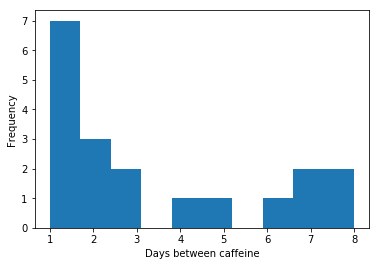

In [21]:
days_btw_caffeine = caffeine.sort_values(by='date')['date'].drop_duplicates().diff().dt.days
days_btw_caffeine = days_btw_caffeine[days_btw_caffeine < 30]
days_btw_caffeine.plot(kind='hist')
plt.xlabel('Days between caffeine')

And therein, my friends, lies the histogram of an addict: I rarely went more than 5 days in between buying myself some form of caffeine.

So it goes. And it was all worth it.